In [1]:
!wget http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/P780.tenv3

--2023-03-08 17:39:57--  http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/P780.tenv3
Resolving geodesy.unr.edu (geodesy.unr.edu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘geodesy.unr.edu’


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('P780.tenv3', sep=' ', skipinitialspace=True, index_col=0)
df

,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),_north(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
site,,,,,,,,,,,,,,,,,,,,,
P780,08MAY27,2008.4025,54613,1481,2,-66.6,2208,0.770329,1999285,0.828290,...,0.0083,0.001724,0.001267,0.006427,-0.104430,0.222023,-0.212698,18.075026,-66.579135,154.06491
P780,08MAY28,2008.4052,54614,1481,3,-66.6,2208,0.771100,1999285,0.828728,...,0.0083,0.000901,0.000730,0.003357,-0.115969,0.068757,-0.117577,18.075026,-66.579135,154.07215
P780,08MAY29,2008.4079,54615,1481,4,-66.6,2208,0.773330,1999285,0.829775,...,0.0083,0.000883,0.000722,0.003321,-0.079310,0.135194,-0.105965,18.075026,-66.579135,154.07643
P780,08MAY30,2008.4107,54616,1481,5,-66.6,2208,0.771673,1999285,0.826960,...,0.0083,0.000883,0.000708,0.003274,-0.069646,0.073039,-0.148988,18.075026,-66.579135,154.08103
P780,08MAY31,2008.4134,54617,1481,6,-66.6,2208,0.769366,1999285,0.827072,...,0.0083,0.000879,0.000705,0.003236,-0.083593,0.101320,-0.105484,18.075026,-66.579135,154.08118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P780,23FEB21,2023.1403,59996,2250,2,-66.6,2208,0.866299,1999285,1.012989,...,0.0083,0.000807,0.000704,0.003312,-0.089855,0.093046,-0.128929,18.075027,-66.579134,154.06035
P780,23FEB22,2023.1431,59997,2250,3,-66.6,2208,0.868251,1999285,1.011587,...,0.0083,0.000822,0.000705,0.003264,-0.107990,0.107456,-0.091247,18.075027,-66.579134,154.06364
P780,23FEB23,2023.1458,59998,2250,4,-66.6,2208,0.870266,1999285,1.010502,...,0.0083,0.000831,0.000729,0.003411,-0.080831,0.104894,-0.102193,18.075027,-66.579134,154.06293


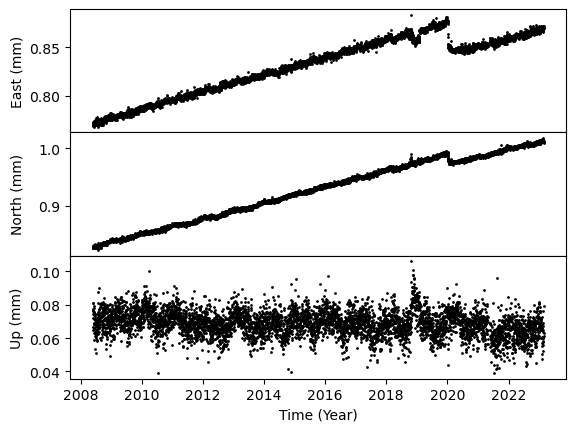

In [40]:
time  = np.array(df["yyyy.yyyy"])
east  = np.array(df["__east(m)"])
north = np.array(df["_north(m)"])
up    = np.array(df["____up(m)"])
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(time, east , "ko", markersize=1);
axs[0].set_ylabel("East (mm)")
axs[1].plot(time, north, "ko", markersize=1);
axs[1].set_ylabel("North (mm)")
axs[2].plot(time, up   , "ko", markersize=1)
axs[2].set_ylabel("Up (mm)"); axs[2].set_xlabel("Time (Year)")
fig.subplots_adjust(hspace=.0); fig.align_labels(axs[:])

In [41]:
# transpose matrix for processing
time  = np.array([time]).T
east  = np.array([east]).T
north = np.array([north]).T
up    = np.array([up]).T

Fitting function
$$
Y(t_i) = a + bt_i + c\sin(\omega t_i) + d\cos(\omega t_i) + e\sin(2\omega t_i) + f\cos(2\omega t_i)
$$

Earthquake:
19sep24 2019.7290
20jan06 2020.0137
20jan07 2020.0164


[[-1.69550566e+01]
 [ 8.82679984e-03]
 [ 3.75883090e-04]
 [ 2.00328481e-04]
 [-1.02774651e-02]
 [ 9.07319205e-03]
 [-3.23445881e-02]]
[[-2.69379146e+01]
 [ 1.38254099e-02]
 [ 1.33977454e-04]
 [ 1.16596089e-03]
 [-1.17007198e-02]
 [ 1.02309412e-02]
 [-1.77734562e-02]]
[[ 6.96219863e-01]
 [-3.11026149e-04]
 [ 2.00187654e-03]
 [ 2.61742817e-03]
 [-8.26531790e-04]
 [ 4.74026850e-04]
 [-1.79852576e-03]]


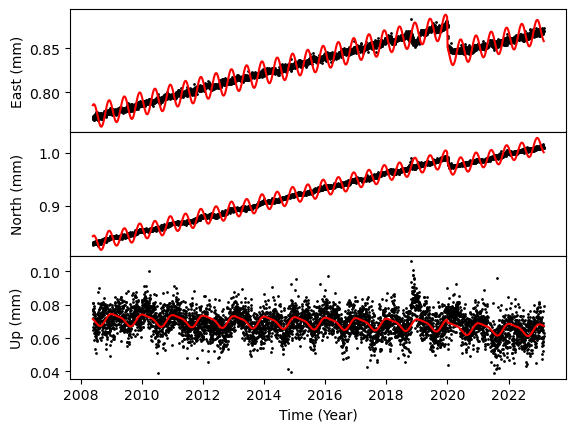

In [43]:
# tg = 2020.0164
tg = 2020.0

def hfunc(t):
    """Heaviside function"""
    if t < tg:
        return 0.
    # elif t == tg:
        # return .5
    else:
        return 1.
hfunc = np.vectorize(hfunc)
# print(hfunc(time))

def lsquare(data):
    A = np.concatenate((np.ones((n,1)),time, np.sin(omega*time), np.cos(omega*time),\
                        np.cos(2*omega*time), np.cos(2*omega*time), hfunc(time)), axis=1)
    N = np.dot(A.T, A)
    # print(N)
    # print(N.shape)
    coef = np.dot(np.linalg.inv(N), A.T)
    coef = np.dot(coef, data)
    return coef

def lsEst(data):
    coef = lsquare(data)
    print(coef)
    # print(coef)
    return coef[0] + coef[1]*t\
        + coef[2]*np.sin(omega*t) + coef[3]*np.cos(omega*t)\
        + coef[4]*np.sin(2*omega*t) + coef[5]*np.cos(2*omega*t) + coef[6]*hfunc(t)

# intial condition
n = len(time)
omega = 2*np.pi
t = np.linspace(min(time), max(time), 1000)

# estimate displacement
eastEst = lsEst(east)
northEst = lsEst(north)
upEst = lsEst(up)

# plot
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(time, east , "ko", markersize=1);
axs[0].set_ylabel("East (mm)")
axs[0].plot(t, eastEst,'r')
axs[1].plot(time, north, "ko", markersize=1);
axs[1].set_ylabel("North (mm)")
axs[1].plot(t, northEst,'r')
axs[2].plot(time, up   , "ko", markersize=1)
axs[2].plot(t, upEst,'r')
axs[2].set_ylabel("Up (mm)"); axs[2].set_xlabel("Time (Year)")
fig.subplots_adjust(hspace=.0); fig.align_labels(axs[:])